In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('data',' ')
#data.info()
data.shape


(648, 45)

In [15]:
X =data.iloc[:,0:43].values
Y = data.iloc[:,35:].values

input_nodes = X.shape[1]
output_nodes = Y.shape[1]

In [17]:
output_nodes

10

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)



array([[0, 0, 3, ..., 4, 4, 1],
       [0, 0, 2, ..., 3, 1, 4],
       [1, 0, 4, ..., 3, 3, 3],
       ...,
       [0, 0, 3, ..., 1, 2, 3],
       [1, 0, 1, ..., 4, 4, 5],
       [0, 0, 1, ..., 2, 3, 1]])

In [27]:
def train_model(input_nodes, hidden_nodes, num_iters):
    #Placeholders for input and output data
    X = tf.placeholder(shape=(None,input_nodes), dtype=tf.float32, name='X')
    y = tf.placeholder(shape=(None,3), dtype=tf.float32, name='y')
    # Variables for two groups of weights between three layers of neurons
    W1 = tf.Variable(np.random.rand(input_nodes, hidden_nodes),dtype=tf.float32)
    W2 = tf.Variable(np.random.rand(hidden_nodes,3),dtype=tf.float32)
    
    
    # Create the neural net graph
    A1 = tf.sigmoid(tf.matmul(X,W1))
    y_est = tf.sigmoid(tf.matmul(A1,W2))
    
    # Define a loss function
    deltas = tf.square(y_est - y)
    loss = tf.reduce_sum(deltas)
    
    # Define a train operation to minimize the loss
    optimizer = tf.train.GradientDescentOptimizer(0.1)
    train = optimizer.minimize(loss)
    
    # Initialize variales and run session
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    
    # Go through num_iters iterations
    for i in range(num_iters):
        sess.run(train, feed_dict={X: X_train, y: y_train})
        loss_plot[hidden_nodes].append(sess.run(loss, feed_dict={X: X_train.as_matrix(), y:y_train.as_matrix()}))
        weights1 = sess.run(W1)
        weights2 = sess.run(W2)
        
    print("loss (hidden nodes: %d, iterations: %d): %.2f" % (hidden_nodes,num_iters,loss_plot[hidden_nodes][-1]))
    sess.close()
    return weights1,weights2

/home/artur/.conda/envs/ML_proj/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


loss (hidden nodes: 5, iterations: 1000): 168085.00
loss (hidden nodes: 10, iterations: 1000): 168085.00
loss (hidden nodes: 20, iterations: 1000): 168085.00
loss (hidden nodes: 30, iterations: 1000): 168085.00
loss (hidden nodes: 40, iterations: 1000): 168085.00


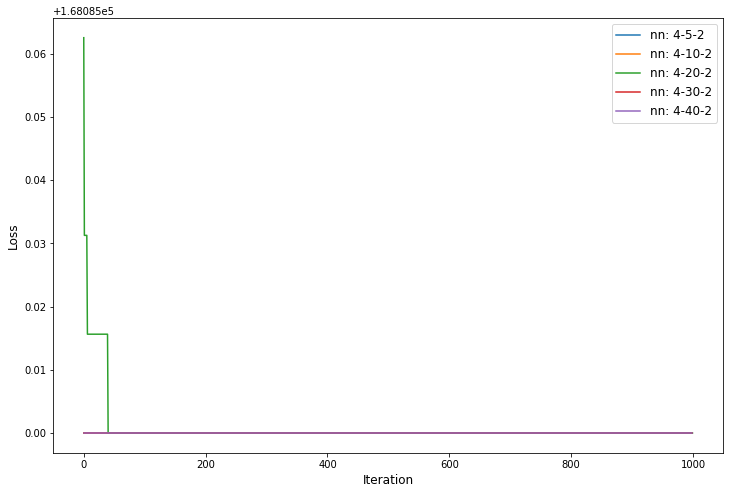

In [28]:
num_hiddens_nodes = [5, 10, 20, 30, 40]
loss_plot = {5: [],10: [], 20: [],30: [], 40: []}
weights1 = {5: None, 10: None, 20: None, 30: None, 40: None}
weights2 = {5: None, 10: None, 20: None, 30: None, 40: None}
num_iters = 1000

plt.figure(figsize=(12,8))
for hidden_nodes in num_hiddens_nodes:
    weights1[hidden_nodes], weights2[hidden_nodes] = train_model(input_nodes,hidden_nodes,num_iters)
    plt.plot(range(num_iters),loss_plot[hidden_nodes], label="nn: 4-%d-2" % hidden_nodes)
    
plt.xlabel('Iteration', fontsize=12)  
plt.ylabel('Loss', fontsize=12)  
plt.legend(fontsize=12)  

In [29]:
# Model evaluation on test set

X = tf.placeholder(shape=(None,input_nodes), dtype = tf.float32, name='X')
y = tf.placeholder(shape=(None,3), dtype = tf.float32, name='y')

for hidden_nodes in num_hiddens_nodes:
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X,W1))
    y_est = tf.sigmoid(tf.matmul(A1,W2))
    
    #Calculate predicted outputs
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: X_test, y: y_test})
        
    # Calculate the prediction accuracy
    
    correct = [estimate.argmax(axis=0) == target.argmax(axis=0)
               for estimate, target in zip(y_est_np, y_test.as_matrix())]
    accuracy = 100 * sum(correct) / len(correct)
    print('Network architecture %d-%d-%d, accuracy: %.2f%%' % (input_nodes,hidden_nodes,output_nodes, accuracy))
    

/home/artur/.conda/envs/ML_proj/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Network architecture 20-5-3, accuracy: 44.10%
Network architecture 20-10-3, accuracy: 44.10%
Network architecture 20-20-3, accuracy: 43.59%
Network architecture 20-30-3, accuracy: 44.10%
Network architecture 20-40-3, accuracy: 44.10%
